<a href="https://colab.research.google.com/github/UW-CTRL/AA548-spr2024/blob/main/homework/hw3_problem2_helper_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

def plot_95_ellipse(mean, covariance, color="black"):
    chi_95 = 5.991
    mean = np.array([[mean[0]],[mean[1]]])
    val, rot = np.linalg.eig(covariance)
    val = np.sqrt(val * chi_95)
    t = np.linspace(0, 2.0 * np.pi, 1000)
    xy = np.stack((np.cos(t), np.sin(t)), axis=-1)

    plt.plot(*(rot @ (val * xy).T + mean), c=color)
    plt.fill(*(rot @ (val * xy).T + mean), alpha=0.3, c=color)

Below, is an example of how to plot ellipses, and also how to plot ellipses emanating from a (velocity) vector starting from points along a trajectory.

In [ ]:
N = 20
x = np.arange(20) * 3
# generate mean velocities and covariances
mean_velocity = np.stack([5*np.cos(0.2 * x), 5*np.sin(0.2 * x)], 1)
covariance_velocity = []
for i in range(N):
    p = np.random.rand(2,2) * 0.5
    covariance_velocity += [p + p.T + np.diag([.5, .5])]

# generate position trajectory
positions = np.stack([x,  x**1.2], 1)

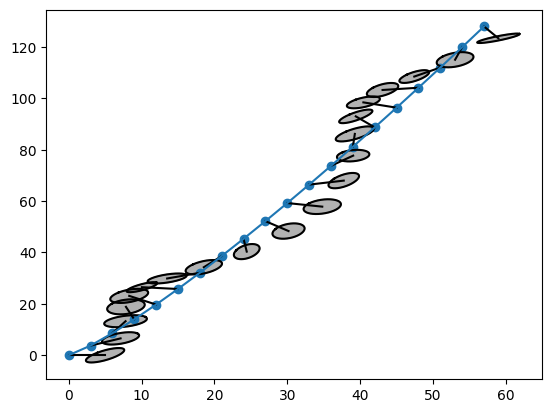

In [ ]:

for (i,(u,v,p)) in enumerate(zip(mean_velocity, covariance_velocity, positions)):
    # plot mean and error ellipses of the velocity along the trajectory of the drone
    # (plotting them as vectors emanating from the quadrotor’s position)
    # with the ellipse centered at the tip of the vector).
    plot_95_ellipse(p+u, v)
    plt.plot([p[0],p[0]+u[0]], [p[1],p[1]+u[1]], c="black")

plt.plot(positions[:,0], positions[:,1])
plt.scatter(positions[:,0], positions[:,1])
